# Demo Predictions

In [1]:
from string import ascii_uppercase

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from imutils.paths import list_images
from tqdm import tqdm_notebook

from image_pipeline import pipeline_for_demo, HandDetector, BgRemover, get_img_ndarray

# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession
# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [2]:
def get_norm_hand_ls(hand_img_dir: str) -> list:
    img_path_list = sorted(list(list_images(hand_img_dir)))
    # img_path_list = img_path_list[:1]

    norm_hand_ls = list()
    for image_path in tqdm_notebook(img_path_list, total=len(img_path_list)):
        alphabet = image_path.split('/')[-1].split('_')[-1].split('.')[0]
        raw_image = get_img_ndarray(image_path)
        norm_hand = pipeline_for_demo(raw_image, hdt, bgr, img_size=28)
        norm_hand_ls.append((alphabet, raw_image, norm_hand))

        # if norm_hand is not None:
        #     show_img(norm_hand, image_path)

    return norm_hand_ls


def predict(norm_hand, model):
    norm_hand = norm_hand / .255
    norm_hand = np.expand_dims(norm_hand, 0)
    pred_cls_idx = np.argmax(model.predict(norm_hand))
    pred_cls = ascii_uppercase[pred_cls_idx]

    return pred_cls


def print_prediction(norm_hand_ls: list, model, model_name, fig_size=(9, 20)):
    fig = plt.figure(figsize=fig_size)
    columns = 4
    rows = 7

    fc = 0
    ax = []  # ax enables access to manipulate each of subplots
    for i in range(columns * rows):
        if i < 26:
            label = norm_hand_ls[i][0]
            img = norm_hand_ls[i][1]
            norm_hand = norm_hand_ls[i][2]
            pred_cls = predict(norm_hand, model)
            if pred_cls != label:
                fc += 1

            title = f"{label} -> {pred_cls}"
        else:
            img = np.random.randint(1, size=(1, 1))
            title = ''

        # create subplot and append to ax
        ax.append(fig.add_subplot(rows, columns, i + 1))

        ax[-1].set_title(title)  # set title
        ax[i].set_axis_off()

        plt.imshow(img)

    plt.show()
    acc = (26 - fc) / 26
    print(f"Model: {model_name}  Accuracy: {round(acc, 2)}")

    return fc, acc

In [3]:
normal_model_dir = 'saved_model/normal_model'
normal_model = tf.keras.models.load_model(normal_model_dir)

stl_model_dir = 'saved_model/normal_model'
stl_model = tf.keras.models.load_model(stl_model_dir)

hdt = HandDetector()
bgr = BgRemover()
bgr.load_model()

2021-11-25 19:44:36.896897: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 19:44:36.909477: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 19:44:36.910079: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-25 19:44:36.911064: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

[INFO] - model loaded


# Jet's Hand

In [4]:
image_dir = 'demo-data/jet' # args

In [5]:
norm_hand_ls = get_norm_hand_ls(image_dir)
len(norm_hand_ls)

/tmp/ipykernel_673/1449847764.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for image_path in tqdm_notebook(img_path_list, total=len(img_path_list)):


  0%|          | 0/26 [00:00<?, ?it/s]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to fetch single hand roi.
[WARN] - roi-normalize failed. By: failed to fetch hand-roi.
case 1 failed
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to fetch single hand roi.
[WARN] - roi-normalize fa

26

## Normal Model

2021-11-25 19:45:32.901994: I tensorflow/stream_executor/cuda/cuda_dnn.cc:366] Loaded cuDNN version 8204


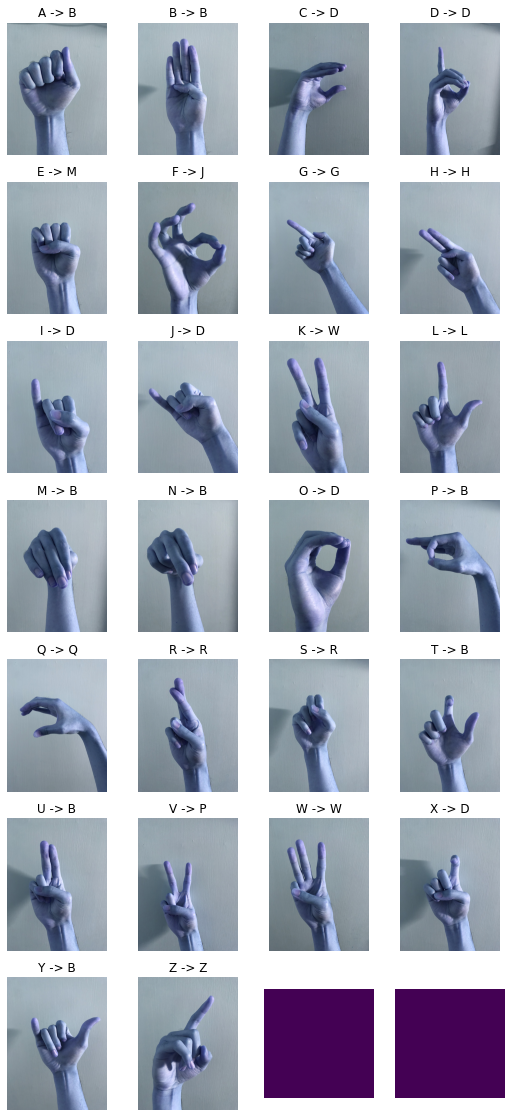

Model: Normal Model  Accuracy: 0.35


(17, 0.34615384615384615)

In [6]:
model = normal_model
print_prediction(norm_hand_ls, model, 'Normal Model')

## STL Model

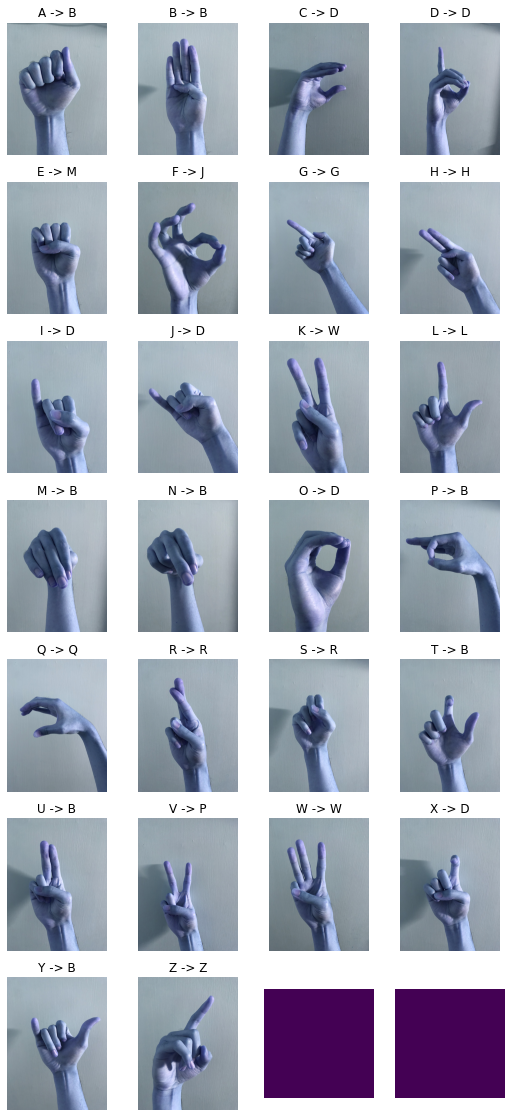

Model: STL Model  Accuracy: 0.35


(17, 0.34615384615384615)

In [7]:
model = stl_model
print_prediction(norm_hand_ls, model, 'STL Model')

# Juan's Hand

In [8]:
image_dir = 'demo-data/juan' # args

In [9]:
norm_hand_ls = get_norm_hand_ls(image_dir)
len(norm_hand_ls)

/tmp/ipykernel_673/1449847764.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for image_path in tqdm_notebook(img_path_list, total=len(img_path_list)):


  0%|          | 0/26 [00:00<?, ?it/s]

[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_detector
[WARN] - Failed to detect hand by hand_d

26

## Normal Model

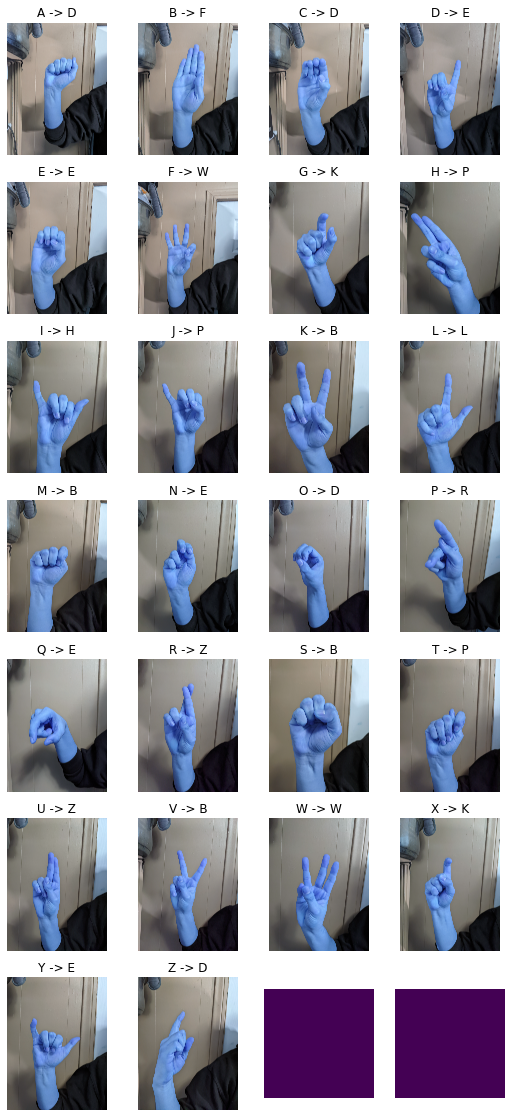

Model: Normal Model  Accuracy: 0.12


(23, 0.11538461538461539)

In [10]:
model = normal_model
print_prediction(norm_hand_ls, model, 'Normal Model')

## STL Model

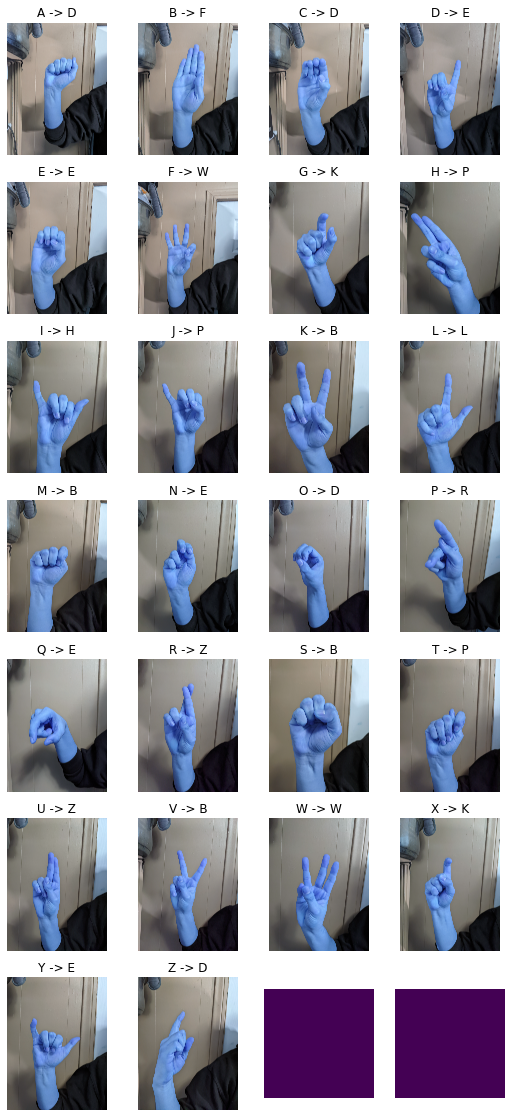

Model: STL Model  Accuracy: 0.12


(23, 0.11538461538461539)

In [11]:
model = stl_model
print_prediction(norm_hand_ls, model, 'STL Model')